In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn 
import warnings; warnings.filterwarnings("ignore"); warnings.simplefilter('ignore')

In [71]:
df = pd.read_csv("milknew.csv")
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


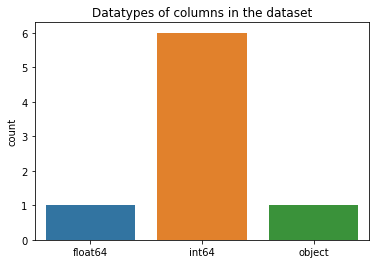

Count of the datatypes of columns
int64      6
float64    1
object     1
dtype: int64


In [72]:
sb.countplot(df.dtypes)
plt.title("Datatypes of columns in the dataset")
plt.show()
print("Count of the datatypes of columns")
print(df.dtypes.value_counts())

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [74]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


DATA PREPROCESSING

In [75]:
print(f'This DataSet Contains {df.shape[0]} rows & {df.shape[1]} columns.')

This DataSet Contains 1059 rows & 8 columns.


NULL VALUES IN THE DATASET

In [76]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

Duplicate Values in the dataset

In [77]:
df.duplicated().sum()

976

In [78]:
df.loc[df.duplicated(),:]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


Exploratory Data Analysis

In [79]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [80]:
df['pH'].value_counts()

6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64

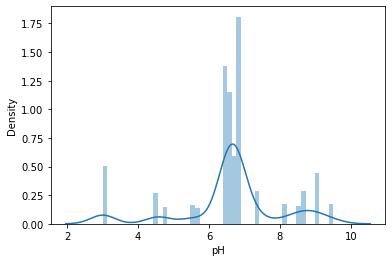

In [81]:
sb.distplot(df['pH'])
plt.show()

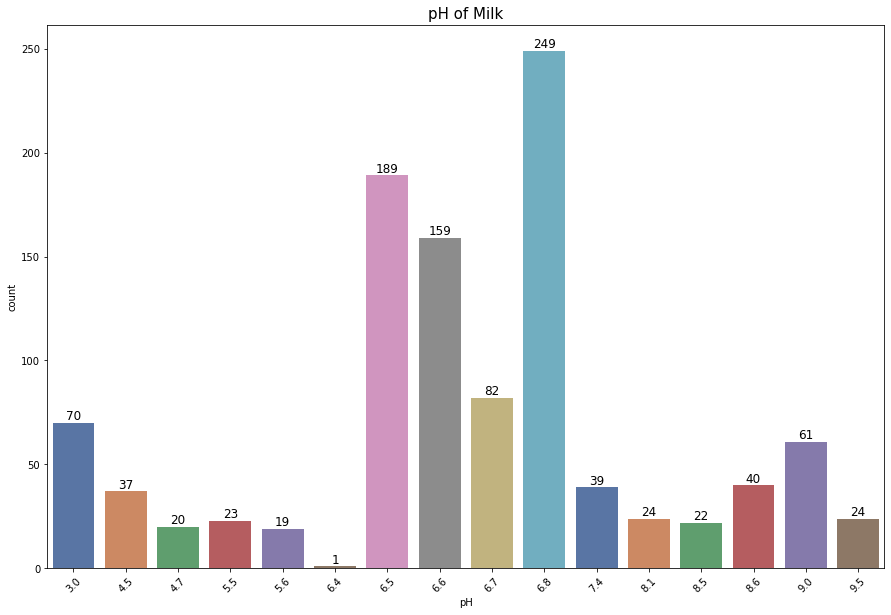

In [82]:
plt.figure(figsize=(15,10))
plt.title("pH of Milk",fontsize=15)
c1=sb.countplot(x='pH',data=df,palette="deep")
c1.bar_label(c1.containers[0],size=12)
plt.xticks(rotation=45)
plt.show()

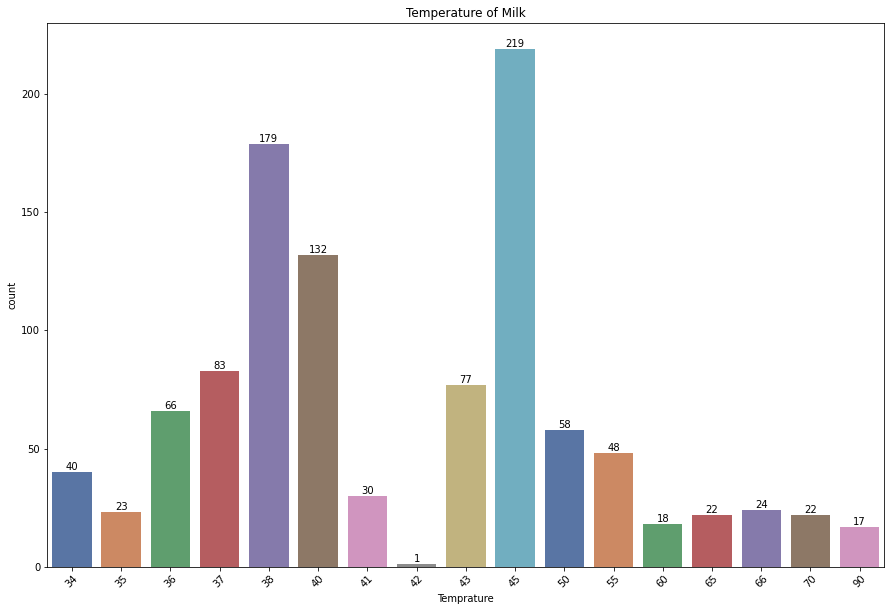

In [83]:
plt.figure(figsize=(15,10))
plt.title("Temperature of Milk")
c1=sb.countplot(x='Temprature',data=df,palette="deep")
c1.bar_label(c1.containers[0],size=10)
plt.xticks(rotation=45)
plt.show()

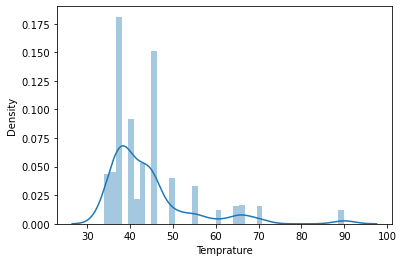

In [84]:
sb.distplot(df['Temprature'])
plt.show()

COLOR

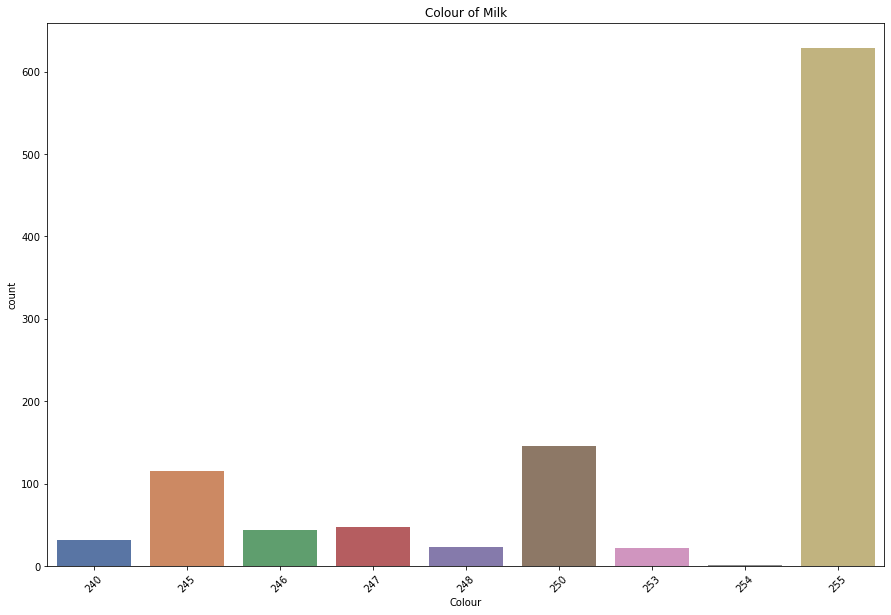

In [85]:
plt.figure(figsize=(15,10))
plt.title("Colour of Milk")
c1=sb.countplot(x='Colour',data=df,palette="deep")
plt.xticks(rotation=45)
plt.show()

Multivariate Analysis

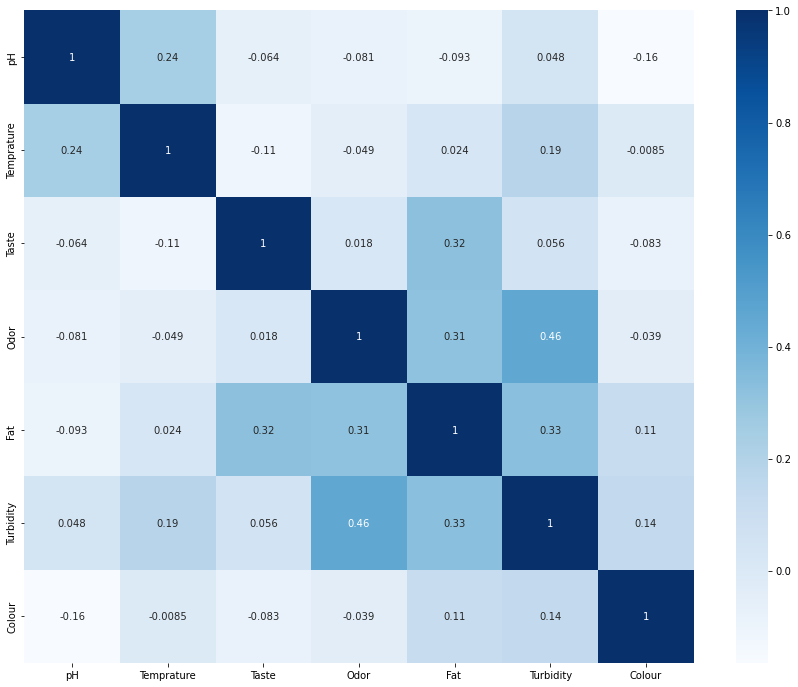

In [86]:
plt.figure(figsize=(15,12))
sb.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

SPLITTING DATASET TRAINING AND TEST

In [87]:
X = df.drop('Grade',axis=1).values
y = df[["Grade"]]

SCALING DATA

In [88]:
sc_X = sklearn.preprocessing.StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(X))

In [89]:
X.head()

,0,1,2,3,4,5,6
0,-0.021531,-0.914107,0.910503,-0.872962,0.699608,-0.982217,0.501600
1,-0.021531,-0.815035,-1.098294,1.145525,-1.429372,1.018105,0.269333
2,1.336564,2.553438,0.910503,1.145525,0.699608,1.018105,-1.356536
3,2.051351,-1.013180,0.910503,1.145525,-1.429372,1.018105,0.733867
4,-0.021531,-0.715962,-1.098294,-0.872962,-1.429372,-0.982217,0.733867


In [90]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(741, 7)
(741, 1)
(318, 7)
(318, 1)


MODEL BUILDING

LogisticRegression

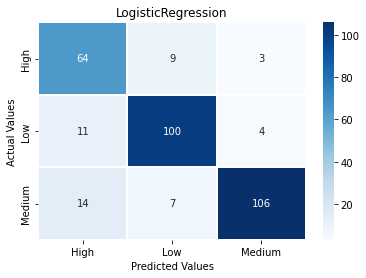

              precision    recall  f1-score   support

        high       0.72      0.84      0.78        76
         low       0.86      0.87      0.87       115
      medium       0.94      0.83      0.88       127

    accuracy                           0.85       318
   macro avg       0.84      0.85      0.84       318
weighted avg       0.86      0.85      0.85       318



In [91]:
LogReg = sklearn.linear_model.LogisticRegression()
LogReg.fit(X_train,y_train)
y_pred = LogReg.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

ax = sb.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_xticklabels(["High","Low","Medium"])
ax.set_yticklabels(["High","Low","Medium"], rotation = 90, va = "center")
plt.title("LogisticRegression")
plt.show()

print(sklearn.metrics.classification_report(y_test, y_pred))


Support Vector

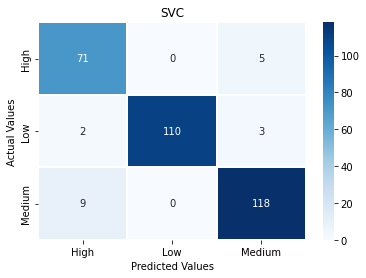

              precision    recall  f1-score   support

        high       0.87      0.93      0.90        76
         low       1.00      0.96      0.98       115
      medium       0.94      0.93      0.93       127

    accuracy                           0.94       318
   macro avg       0.93      0.94      0.94       318
weighted avg       0.94      0.94      0.94       318



In [92]:
svc = sklearn.svm.SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

ax = sb.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_xticklabels(["High","Low","Medium"])
ax.set_yticklabels(["High","Low","Medium"], rotation = 90, va = "center")
plt.title("SVC")
plt.show()

print(sklearn.metrics.classification_report(y_test, y_pred))


Random Forest

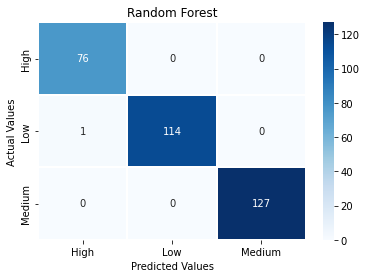

              precision    recall  f1-score   support

        high       0.99      1.00      0.99        76
         low       1.00      0.99      1.00       115
      medium       1.00      1.00      1.00       127

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



In [93]:
rf = sklearn.ensemble.RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

ax = sb.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_xticklabels(["High","Low","Medium"])
ax.set_yticklabels(["High","Low","Medium"], rotation = 90, va = "center")
plt.title("Random Forest")
plt.show()

print(sklearn.metrics.classification_report(y_test, y_pred))

Decision Tree

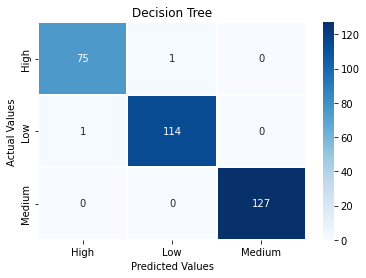

              precision    recall  f1-score   support

        high       0.99      0.99      0.99        76
         low       0.99      0.99      0.99       115
      medium       1.00      1.00      1.00       127

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



In [94]:
dt = sklearn.tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

ax = sb.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_xticklabels(["High","Low","Medium"])
ax.set_yticklabels(["High","Low","Medium"], rotation = 90, va = "center")
plt.title("Decision Tree")
plt.show()

print(sklearn.metrics.classification_report(y_test, y_pred))

Gradient Boosting

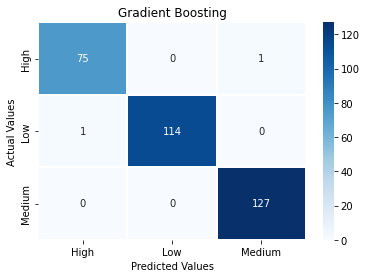

              precision    recall  f1-score   support

        high       0.99      0.99      0.99        76
         low       1.00      0.99      1.00       115
      medium       0.99      1.00      1.00       127

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



In [95]:
GB = sklearn.ensemble.GradientBoostingClassifier()
GB.fit(X_train,y_train)
y_pred = GB.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

ax = sb.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_xticklabels(["High","Low","Medium"])
ax.set_yticklabels(["High","Low","Medium"], rotation = 90, va = "center")
plt.title("Gradient Boosting")
plt.show()

print(sklearn.metrics.classification_report(y_test, y_pred))

KNeighborsClassifier

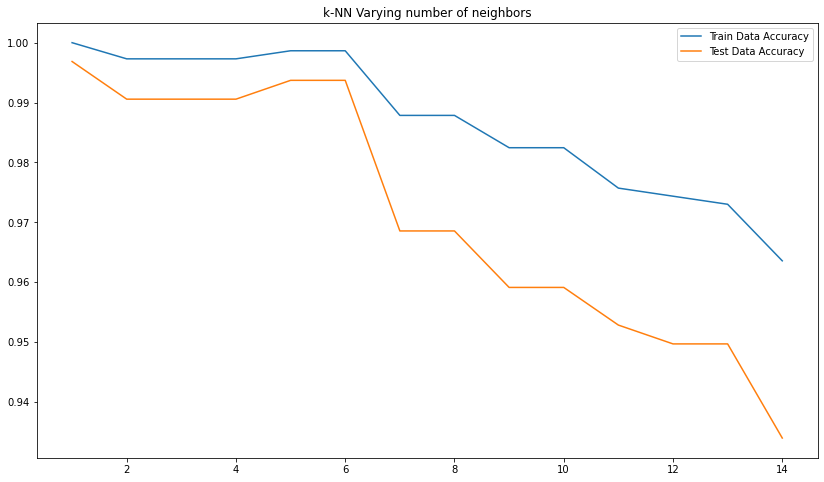

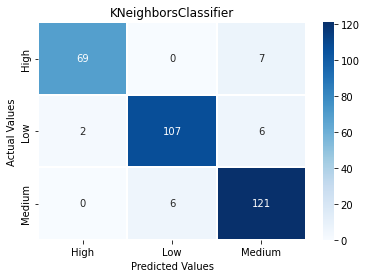

              precision    recall  f1-score   support

        high       0.97      0.91      0.94        76
         low       0.95      0.93      0.94       115
      medium       0.90      0.95      0.93       127

    accuracy                           0.93       318
   macro avg       0.94      0.93      0.93       318
weighted avg       0.94      0.93      0.93       318



In [96]:
test_acc=[]
train_acc=[]

for i in range(1,15):
  knn = sklearn.neighbors.KNeighborsClassifier(i)
  knn.fit(X_train,y_train)
  train_acc.append(knn.score(X_train,y_train))
  test_acc.append(knn.score(X_test,y_test))

plt.figure(figsize=(14,8))
plt.title('k-NN Varying number of neighbors')
sb.lineplot(range(1,15),train_acc,label='Train Data Accuracy')
sb.lineplot(range(1,15),test_acc,label='Test Data Accuracy')
plt.show()

y_pred = knn.predict(X_test)
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

ax = sb.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_xticklabels(["High","Low","Medium"])
ax.set_yticklabels(["High","Low","Medium"], rotation = 90, va = "center")
plt.title("KNeighborsClassifier")
plt.show()

print(sklearn.metrics.classification_report(y_test,y_pred, zero_division=1))